## Introduction
This project aims to predict the prices of laptops using a dataset containing various attributes such as brand, processor, RAM, storage, and other features. The objective is to create a machine learning model that accurately predicts prices and improves upon initial predictions through feature engineering and optimization.

## Problem Statement
We are tasked with building a predictive model that estimates laptop prices based on specifications. By leveraging machine learning techniques, we aim to achieve a high R-squared value and low MAE (Mean Absolute Error).


## Import Libraries

In [1]:
# Data handling and preprocessing
import pandas as pd 
import numpy as np
# Visualization
import matplotlib.pyplot as plt


## Data Acquisition
The dataset for this project contains over 1302 laptop entries with features such as brand, RAM, storage, processor, etc.

The data can be loaded as follows:

In [2]:
# Load the dataset
df = pd.read_csv('laptop_data.csv')

In [4]:
# Display the first few rows
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


## Exploratory Data Analysis (EDA)
We perform an initial exploration of the dataset to understand its structure, identify missing values, and spot potential outliers.

In [3]:
# Basic statistics of the dataset
#check shape,datatype and check duplicates,null 
df.shape


(1303, 12)

In [4]:
df.duplicated().sum()

0

In [5]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [6]:
df.dtypes

Unnamed: 0            int64
Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price               float64
dtype: object

In [7]:
df['Price']

0        71378.6832
1        47895.5232
2        30636.0000
3       135195.3360
4        96095.8080
           ...     
1298     33992.6400
1299     79866.7200
1300     12201.1200
1301     40705.9200
1302     19660.3200
Name: Price, Length: 1303, dtype: float64

In [9]:
#change float value to integer.
df.isna().count()

Unnamed: 0          1303
Company             1303
TypeName            1303
Inches              1303
ScreenResolution    1303
Cpu                 1303
Ram                 1303
Memory              1303
Gpu                 1303
OpSys               1303
Weight              1303
Price               1303
dtype: int64

In [10]:
df['Price'].astype(int)

0        71378
1        47895
2        30636
3       135195
4        96095
         ...  
1298     33992
1299     79866
1300     12201
1301     40705
1302     19660
Name: Price, Length: 1303, dtype: int32

In [11]:
df.dtypes

Unnamed: 0            int64
Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price               float64
dtype: object

In [12]:
df.drop(columns=["Unnamed: 0"],inplace=True)

In [13]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [14]:
#change dtype:
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')

In [15]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [16]:
df['Ram'] =  df['Ram'].astype('int')
df['Weight'] = df['Weight'].astype('float')
df['Price'] =  df['Price'].astype('int')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   int32  
dtypes: float64(2), int32(2), object(7)
memory usage: 101.9+ KB


In [18]:
import seaborn as sns 

C:\Users\sandh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Price
95850    14
58554    14
79866    14
47898    11
63882    11
         ..
40439     1
98994     1
61485     1
67932     1
59513     1
Name: count, Length: 774, dtype: int64

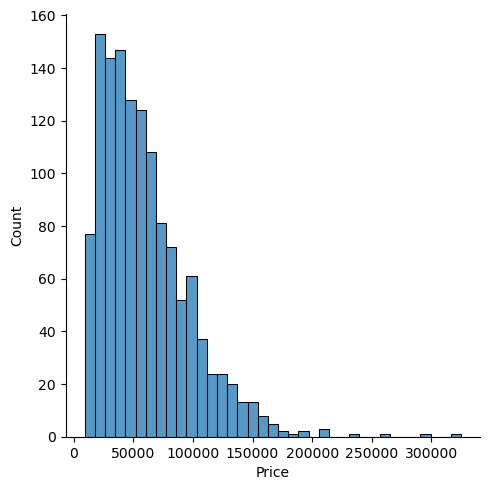

In [19]:
sns.displot(df['Price'])
df['Price'].value_counts()


In [20]:
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

Price
95850    14
58554    14
79866    14
47898    11
63882    11
         ..
40439     1
98994     1
61485     1
67932     1
59513     1
Name: count, Length: 774, dtype: int64

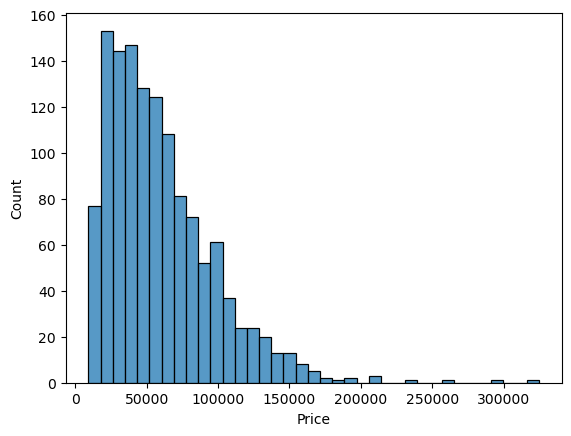

In [21]:
sns.histplot(df['Price'])
df['Price'].value_counts()


<Axes: xlabel='Company'>

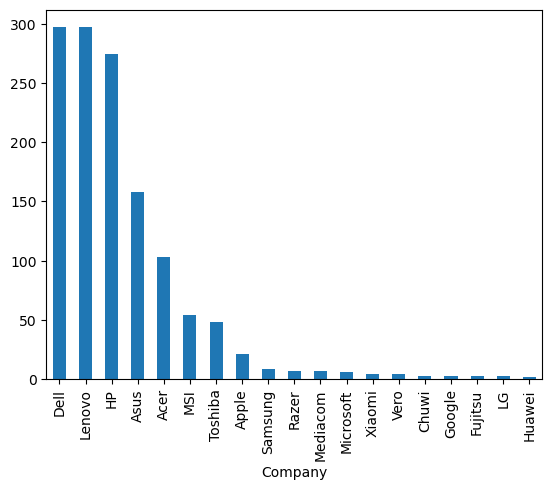

In [22]:
df['Company'].value_counts().plot(kind='bar')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Apple'),
  Text(1, 0, 'HP'),
  Text(2, 0, 'Acer'),
  Text(3, 0, 'Asus'),
  Text(4, 0, 'Dell'),
  Text(5, 0, 'Lenovo'),
  Text(6, 0, 'Chuwi'),
  Text(7, 0, 'MSI'),
  Text(8, 0, 'Microsoft'),
  Text(9, 0, 'Toshiba'),
  Text(10, 0, 'Huawei'),
  Text(11, 0, 'Xiaomi'),
  Text(12, 0, 'Vero'),
  Text(13, 0, 'Razer'),
  Text(14, 0, 'Mediacom'),
  Text(15, 0, 'Samsung'),
  Text(16, 0, 'Google'),
  Text(17, 0, 'Fujitsu'),
  Text(18, 0, 'LG')])

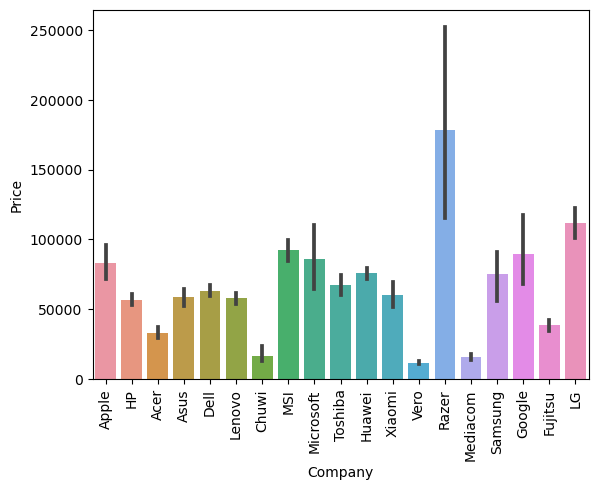

In [23]:
#let's check what is relation of company and price 
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Ultrabook'),
  Text(1, 0, 'Notebook'),
  Text(2, 0, 'Netbook'),
  Text(3, 0, 'Gaming'),
  Text(4, 0, '2 in 1 Convertible'),
  Text(5, 0, 'Workstation')])

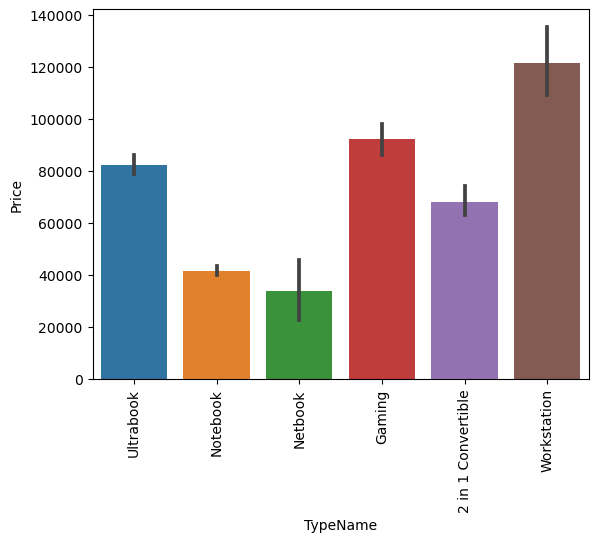

In [24]:
#relation between typename and prices 
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')


TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: count, dtype: int64

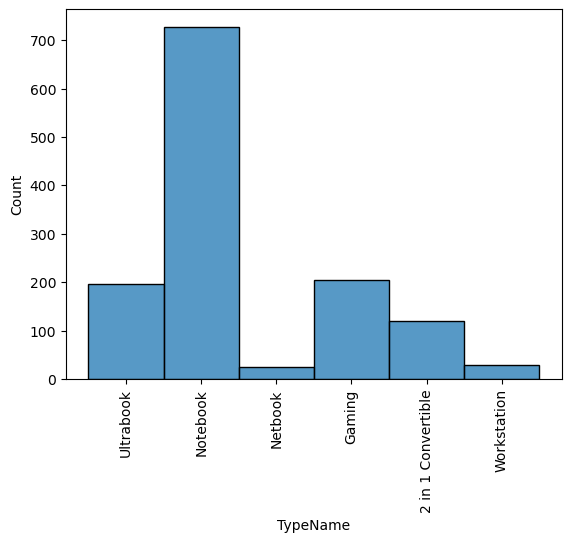

In [25]:
sns.histplot(df['TypeName'])
plt.xticks(rotation='vertical')
df['TypeName'].value_counts()


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   int32  
dtypes: float64(2), int32(2), object(7)
memory usage: 101.9+ KB


Inches
15.6    665
14.0    197
13.3    164
17.3    164
12.5     39
11.6     33
12.0      6
13.5      6
13.9      6
12.3      5
10.1      4
15.4      4
15.0      4
13.0      2
18.4      1
17.0      1
14.1      1
11.3      1
Name: count, dtype: int64

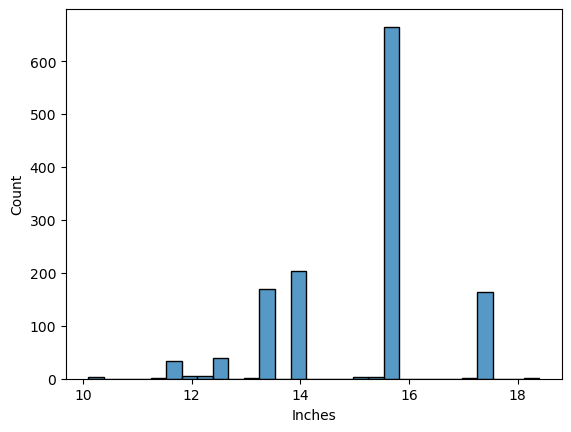

In [27]:
sns.histplot(df['Inches'])
df['Inches'].value_counts()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, '10.1'),
  Text(1, 0, '11.3'),
  Text(2, 0, '11.6'),
  Text(3, 0, '12.0'),
  Text(4, 0, '12.3'),
  Text(5, 0, '12.5'),
  Text(6, 0, '13.0'),
  Text(7, 0, '13.3'),
  Text(8, 0, '13.5'),
  Text(9, 0, '13.9'),
  Text(10, 0, '14.0'),
  Text(11, 0, '14.1'),
  Text(12, 0, '15.0'),
  Text(13, 0, '15.4'),
  Text(14, 0, '15.6'),
  Text(15, 0, '17.0'),
  Text(16, 0, '17.3'),
  Text(17, 0, '18.4')])

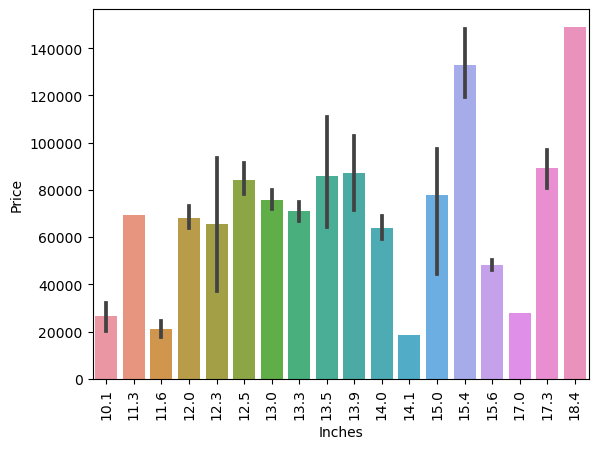

In [28]:
#relation between perice and inches.
sns.barplot(x=df['Inches'],y=df['Price'])
plt.xticks(rotation='vertical')


In [29]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [30]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [31]:
df['Touchscreen'] 

0       0
1       0
2       0
3       0
4       0
       ..
1298    1
1299    1
1300    0
1301    0
1302    0
Name: Touchscreen, Length: 1303, dtype: int64

In [32]:
df.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
270,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.9GHz,8,512GB SSD,Intel Iris Graphics 550,macOS,1.37,104370,0
994,Dell,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.68,47365,1
1006,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4,256GB SSD,Intel HD Graphics 620,Windows 10,1.95,64202,0
1121,HP,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.16,90043,0
1063,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,16,2TB HDD,AMD Radeon R7 M445,Windows 10,2.32,52746,0
273,Lenovo,2 in 1 Convertible,14.0,Touchscreen 2560x1440,Intel Core i7 6600U 2.6GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.36,133146,1
450,HP,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,8,128GB SSD,Intel HD Graphics 620,Windows 10,1.91,31381,0
665,Toshiba,Notebook,15.6,1366x768,Intel Core i3 6100U 2.1GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,2.10,26533,0
1128,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,No OS,2.40,52693,0
532,Asus,Notebook,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7500U 2.7GHz,8,256GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.00,69210,0


In [33]:
#how many laptops are tocuhscreen or not  touchscreen.
df['Touchscreen'].value_counts()

Touchscreen
0    1111
1     192
Name: count, dtype: int64

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

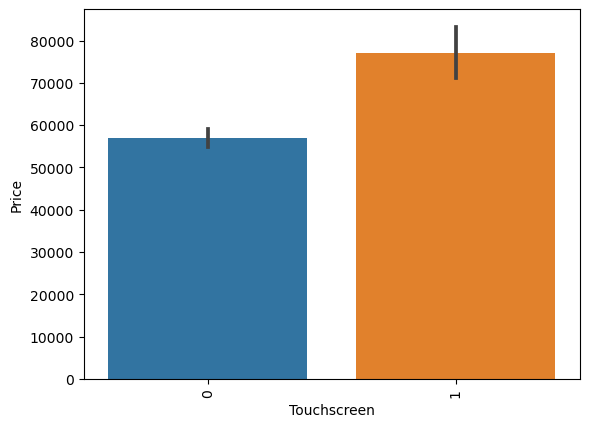

In [34]:
sns.barplot(x=df['Touchscreen'],y=df['Price'])
plt.xticks(rotation='vertical')

In [35]:
#creating new column for ips  panel
df['IPS']= df['ScreenResolution'].apply(lambda x:1 if "IPS" in x else 0)

In [36]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1


In [37]:
df['IPS'].value_counts()

IPS
0    938
1    365
Name: count, dtype: int64

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

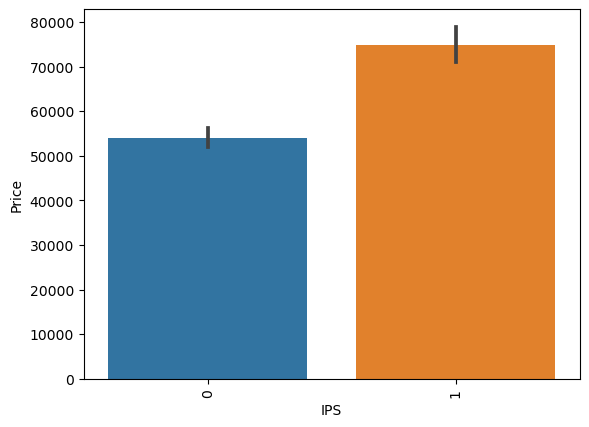

In [38]:
#relation between price and IPS.
sns.barplot(x=df['IPS'],y=df['Price'])
plt.xticks(rotation='vertical')


In [39]:
new = df['ScreenResolution'].str.split('x',n=1,expand= True)

In [40]:
df['X_res'] = new[0]
df['Y_res'] = new[1]

In [41]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,IPS Panel Retina Display 2560,1600


In [42]:
#getting absX_res value
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [43]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,2560,1600


In [44]:
df['X_res'] =  df['X_res'].astype('int')

In [45]:
df['Y_res'] =  df['X_res'].astype('int')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   int32  
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: float64(2), int32(4), int64(2), object(7)
memory usage: 132.5+ KB


In [47]:
df.head()  # Print first few rows of DataFrame
df.dtypes

Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                   int32
Memory               object
Gpu                  object
OpSys                object
Weight              float64
Price                 int32
Touchscreen           int64
IPS                   int64
X_res                 int32
Y_res                 int32
dtype: object

In [48]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price', 'Touchscreen', 'IPS',
       'X_res', 'Y_res'],
      dtype='object')

In [49]:
df['Price'].unique()

array([ 71378,  47895,  30636, 135195,  96095,  21312, 114017,  61735,
        79653,  41025,  20986,  18381, 130001,  26581,  67260,  80908,
        39693, 152274,  26586,  52161,  10224,  53226,  13746,  43636,
        35111,  22305,  58554,  42624,  69157,  47738,  13053,  10602,
        23389,  99580,  53173,  13266,  19553,  26037,  46833,  20725,
        79866,  27864,  36336,  75604,  19660,  69210,  34045,  24828,
        16996,  44808,  21231,  58767,  20459,  40908,  31232, 130482,
        22111,  31914,  50136,  36763, 105654,  23373,  12201,  29250,
        50562,  58021,  50882,  46353,  58341,  27652,  45554,  28238,
        52054,  58403,  80452,  45820,  21258,  21045,  71874,  37242,
        77202,  87858,  36709,  63776,  63669,  55890,  45128,  31962,
        25840,  30742,  66546,  38308,  18594,  34472,  59620,  71395,
        22105,  63563,  78854,  67239,  73473,  74538,  38468,  86793,
        57755,  60223,  30049,  59567,  25521, 119427,  33513,  67718,
      

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   int32  
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: float64(2), int32(4), int64(2), object(7)
memory usage: 132.5+ KB


In [51]:
df['Price_numeric'] = pd.to_numeric(df['Price'], errors='coerce')


In [52]:
non_numeric_rows = df[df['Price_numeric'].isna()]

In [53]:
print(non_numeric_rows)

Empty DataFrame
Columns: [Company, TypeName, Inches, ScreenResolution, Cpu, Ram, Memory, Gpu, OpSys, Weight, Price, Touchscreen, IPS, X_res, Y_res, Price_numeric]
Index: []


In [54]:
df.drop(columns=['Price_numeric'], inplace=True)

## Data Preprocessing
Before feeding the data into machine learning models, we preprocess the dataset by handling missing values, encoding categorical variables, and scaling numeric features.

## Feature Engineering
We create new features based on existing ones to improve model accuracy. Feature engineering plays a critical role in enhancing the predictive power of the model.
python

In [55]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,2560,2560
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,1440,1440
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,1920,1920
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,0,1,2880,2880
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,2560,2560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992,1,1,1920,1920
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866,1,1,3200,3200
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201,0,0,1366,1366
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705,0,0,1366,1366


In [56]:
# I have made one new column called price per inches ("ppi") and convert into float data type ,it has strong co-relation.
#with dataset and also i will drop the column x_res,y_res,inches because i made one column "ppi"
df['ppi'] = (df['X_res']**2 + df['Y_res']**2)**0.5 / df['Inches'].astype('float')

In [57]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res,ppi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,2560,2560,272.209528
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,1440,1440,153.117859
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,1920,1920,174.057054
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,0,1,2880,2880,264.476303
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,2560,2560,272.209528


In [58]:
df.dtypes

Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                   int32
Memory               object
Gpu                  object
OpSys                object
Weight              float64
Price                 int32
Touchscreen           int64
IPS                   int64
X_res                 int32
Y_res                 int32
ppi                 float64
dtype: object

In [59]:
df.drop(columns=['Inches','X_res','Y_res'],inplace=True)

In [60]:
df.sample(10)

,Company,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi
910,Dell,Notebook,Full HD 1920x1080,Intel Core i5 7440HQ 2.8GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.60,64202,0,0,193.949289
406,Toshiba,Ultrabook,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.20,93080,0,0,204.157146
708,Lenovo,Notebook,Full HD 1920x1080,Intel Core i5 6300HQ 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.80,63456,0,0,193.949289
715,Lenovo,Notebook,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Nvidia GeForce 920MX,Windows 10,1.87,45664,0,1,193.949289
953,Asus,2 in 1 Convertible,Full HD 1920x1080,Intel Core M M7-6Y75 1.2GHz,8,64GB Flash Storage,Intel HD Graphics 515,Chrome OS,1.20,61751,0,0,217.223203
850,HP,Notebook,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4,128GB SSD,Intel HD Graphics 400,No OS,1.86,15930,0,0,123.834341
1198,Acer,Notebook,1366x768,Intel Celeron Dual Core N3350 2GHz,4,1TB HDD,Intel HD Graphics 500,Linux,2.10,14492,0,0,123.834341
139,HP,Notebook,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4,256GB SSD,Intel HD Graphics 620,Windows 10,1.32,37242,0,1,204.157146
909,LG,Ultrabook,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,8,512GB SSD,Intel HD Graphics 620,Windows 10,0.98,101178,1,1,193.949289
282,Lenovo,Gaming,IPS Panel Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,256GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.50,44169,0,1,174.057054


In [61]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [62]:
#get intial 3 values 
df['Cpu_Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [63]:
df.head()

,Company,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu_Name
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,272.209528,Intel Core i5
1,Apple,Ultrabook,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,153.117859,Intel Core i5
2,HP,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,174.057054,Intel Core i5
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,0,1,264.476303,Intel Core i7
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,272.209528,Intel Core i5


In [64]:
#let's make a function.
def fetch_processor(text):
    if text=='Intel Core i7' or text =='Intel Core i5' or text=='Intel Core i3':
        return text
    else:
        if text.split()[0]=='Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [65]:
df['Cpu brand'] = df['Cpu_Name'].apply(fetch_processor)

In [66]:
df.head()

,Company,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu_Name,Cpu brand
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,272.209528,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,153.117859,Intel Core i5,Intel Core i5
2,HP,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,174.057054,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,0,1,264.476303,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,272.209528,Intel Core i5,Intel Core i5


In [67]:
df.sample(5)

,Company,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu_Name,Cpu brand
778,Razer,Gaming,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,512GB SSD,Nvidia GeForce GTX 1060,Windows 10,1.95,154458,0,0,193.949289,Intel Core i7,Intel Core i7
774,HP,Ultrabook,1366x768,Intel Core i5 6200U 2.3GHz,4,256GB SSD,Intel HD Graphics 520,Windows 10,1.26,66280,0,0,154.545258,Intel Core i5,Intel Core i5
756,HP,Notebook,IPS Panel Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.20,58554,0,1,174.057054,Intel Core i5,Intel Core i5
885,HP,2 in 1 Convertible,Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,4,256GB SSD,Intel HD Graphics 620,Windows 10,1.28,95850,1,0,204.157146,Intel Core i5,Intel Core i5
690,Acer,Notebook,1366x768,Intel Celeron Dual Core 3855U 1.6GHz,4,32GB Flash Storage,Intel HD Graphics 510,Chrome OS,1.45,19980,0,0,137.986838,Intel Celeron Dual,Other Intel Processor


<Axes: xlabel='Cpu brand'>

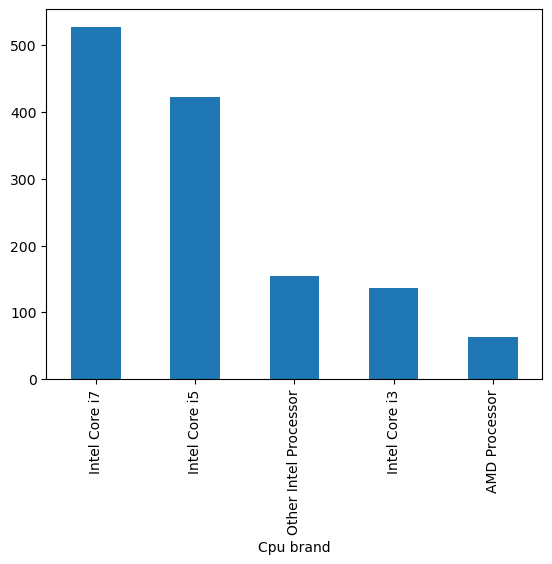

In [68]:
df['Cpu brand'].value_counts().plot(kind = 'bar')

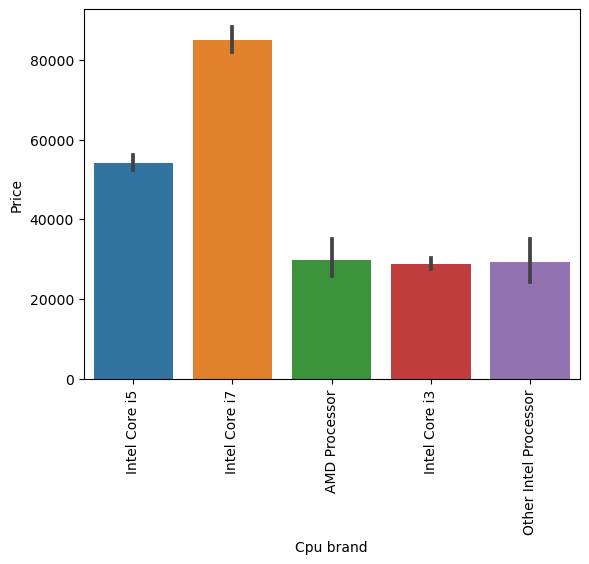

In [69]:
sns.barplot(x=df['Cpu brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()


In [70]:
#drop two columns name.
df.drop(columns=['Cpu','Cpu_Name'],inplace=True)


In [71]:
df.head()

,Company,TypeName,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,272.209528,Intel Core i5
1,Apple,Ultrabook,1440x900,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,153.117859,Intel Core i5
2,HP,Notebook,Full HD 1920x1080,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,174.057054,Intel Core i5
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,0,1,264.476303,Intel Core i7
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,272.209528,Intel Core i5


In [72]:
df['Ram'].value_counts()


Ram
8     619
4     375
16    200
6      41
12     25
2      22
32     17
24      3
64      1
Name: count, dtype: int64

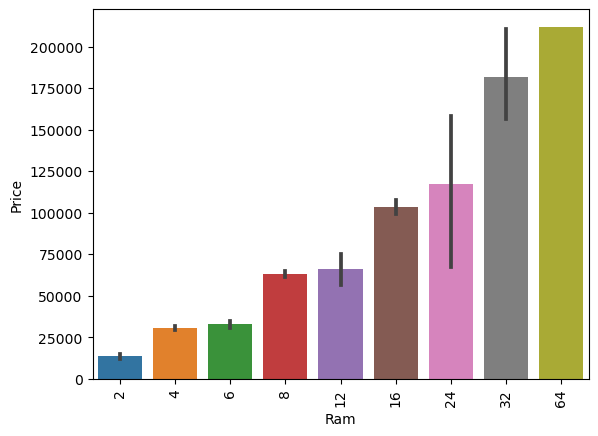

In [73]:
sns.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()


In [74]:
df[['Ram', 'Price']].value_counts()

Ram  Price 
8    58554     11
     63882      9
     47898      9
     74538      9
16   95850      9
               ..
8    35324      1
     35431      1
     35644      1
     35964      1
64   211788     1
Name: count, Length: 931, dtype: int64

In [75]:
df["Memory"].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [76]:

# Convert 'Memory' column to string and clean up the values
df['Memory'] = df['Memory'].astype(str).replace('\.0','',regex=True)
df['Memory'] = df['Memory'].str.replace('GB','')
df['Memory'] = df['Memory'].str.replace('TB','000')

# Split 'Memory' into 'First' and 'Second'
new = df['Memory'].str.split("+", n=1, expand=True)
df["First"] = new[0].str.strip()
df["Second"] = new[1]

# Apply the necessary checks for 'First' column
df['Layer1HDD'] = df["First"].apply(lambda x: 1 if "HDD" in x else 0)
df['Layer1SDD'] = df["First"].apply(lambda x: 1 if "SDD" in x else 0)
df['Layer1Hybrid'] = df["First"].apply(lambda x: 1 if "Hybrid" in x else 0)
df['Layer1Flash_Storage'] = df["First"].apply(lambda x: 1 if "Flash Storage" in x else 0)

# Remove non-numeric characters from 'First'
df["First"] = df["First"].str.replace(r'\D', '', regex=True)

# Fill NaN values in 'Second' column with "0"
df["Second"].fillna("0", inplace=True)

# Apply the necessary checks for 'Second' column
df['Layer2HDD'] = df["Second"].apply(lambda x: 1 if "HDD" in x else 0)
df['Layer2SDD'] = df["Second"].apply(lambda x: 1 if "SDD" in x else 0)
df['Layer2Hybrid'] = df["Second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df['Layer2Flash_Storage'] = df["Second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

# Remove non-numeric characters from 'Second'
df["Second"] = df["Second"].str.replace(r'\D', '', regex=True)

# Convert 'First' and 'Second' to numeric, handling errors
df["First"] = pd.to_numeric(df["First"], errors='coerce').fillna(0).astype(int)
df["Second"] = pd.to_numeric(df["Second"], errors='coerce').fillna(0).astype(int)

df["HDD"] = (df["First"]*df["Layer1HDD"]+df["Second"]*df["Layer2HDD"])
df["SDD"] = (df["First"]*df["Layer1SDD"]+df["Second"]*df["Layer2SDD"])
df["Hybrid"] = (df["First"]*df["Layer1Hybrid"]+df["Second"]*df["Layer2Hybrid"])
df["Flash_Storage"] = (df["First"]*df["Layer1Flash_Storage"]+df["Second"]*df["Layer2Flash_Storage"])


In [77]:
df.head()

,Company,TypeName,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,...,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SDD,Layer2Hybrid,Layer2Flash_Storage,HDD,SDD,Hybrid,Flash_Storage
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,...,0,0,0,0,0,0,0,0,0,0
1,Apple,Ultrabook,1440x900,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,...,0,1,0,0,0,0,0,0,0,128
2,HP,Notebook,Full HD 1920x1080,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636,0,...,0,0,0,0,0,0,0,0,0,0
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195,0,...,0,0,0,0,0,0,0,0,0,0
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
df.columns

Index(['Company', 'TypeName', 'ScreenResolution', 'Ram', 'Memory', 'Gpu',
       'OpSys', 'Weight', 'Price', 'Touchscreen', 'IPS', 'ppi', 'Cpu brand',
       'First', 'Second', 'Layer1HDD', 'Layer1SDD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SDD', 'Layer2Hybrid',
       'Layer2Flash_Storage', 'HDD', 'SDD', 'Hybrid', 'Flash_Storage'],
      dtype='object')

In [79]:
df.drop(columns=['First', 'Second', 'Layer1HDD', 'Layer1SDD', 'Layer1Hybrid',
                 'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SDD', 'Layer2Hybrid','Layer2Flash_Storage'],inplace=True)

In [80]:
df.head()

,Company,TypeName,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SDD,Hybrid,Flash_Storage
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,272.209528,Intel Core i5,0,0,0,0
1,Apple,Ultrabook,1440x900,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,153.117859,Intel Core i5,0,0,0,128
2,HP,Notebook,Full HD 1920x1080,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,174.057054,Intel Core i5,0,0,0,0
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195,0,1,264.476303,Intel Core i7,0,0,0,0
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,272.209528,Intel Core i5,0,0,0,0


In [81]:
df.sample(10)

,Company,TypeName,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SDD,Hybrid,Flash_Storage
422,HP,Notebook,Full HD 1920x1080,8,256 SSD,Intel HD Graphics 630,Windows 10,2.31,76030,0,0,174.057054,Intel Core i7,0,0,0,0
800,HP,Workstation,Full HD 1920x1080,8,256 SSD,Nvidia Quadro M2200,Windows 10,3.14,110017,0,0,174.057054,Intel Core i7,0,0,0,0
850,HP,Notebook,1366x768,4,128 SSD,Intel HD Graphics 400,No OS,1.86,15930,0,0,123.834341,Other Intel Processor,0,0,0,0
1070,Dell,Notebook,1366x768,4,500 HDD,Intel HD Graphics 520,Windows 10,2.06,25679,0,0,123.834341,Intel Core i3,500,0,0,0
574,Lenovo,Notebook,Full HD 1920x1080,4,500 HDD,Intel HD Graphics 620,Windows 10,2.05,36496,0,0,174.057054,Intel Core i5,500,0,0,0
1123,Dell,Notebook,1366x768,4,500 HDD,Intel HD Graphics 520,Linux,2.09,27899,0,0,123.834341,Intel Core i5,500,0,0,0
984,Toshiba,Notebook,1366x768,4,500 HDD,Intel HD Graphics 520,Windows 10,1.75,48751,0,0,137.986838,Intel Core i5,500,0,0,0
1140,Lenovo,2 in 1 Convertible,IPS Panel Touchscreen 2560x1440,16,512 SSD,Intel HD Graphics 520,Windows 10,2.80,130003,1,1,258.599051,Intel Core i7,0,0,0,0
199,HP,Notebook,Full HD 1920x1080,8,256 SSD,Nvidia GeForce 930MX,Windows 10,2.50,55677,0,0,156.953181,Intel Core i7,0,0,0,0
1037,Toshiba,Ultrabook,IPS Panel Full HD 1920x1080,8,256 SSD,Intel HD Graphics 520,Windows 10,1.47,91908,0,1,193.949289,Intel Core i7,0,0,0,0


In [82]:
df.drop(columns=['Memory'],inplace=True)

In [83]:
df.head()

,Company,TypeName,ScreenResolution,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SDD,Hybrid,Flash_Storage
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,8,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,272.209528,Intel Core i5,0,0,0,0
1,Apple,Ultrabook,1440x900,8,Intel HD Graphics 6000,macOS,1.34,47895,0,0,153.117859,Intel Core i5,0,0,0,128
2,HP,Notebook,Full HD 1920x1080,8,Intel HD Graphics 620,No OS,1.86,30636,0,0,174.057054,Intel Core i5,0,0,0,0
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,16,AMD Radeon Pro 455,macOS,1.83,135195,0,1,264.476303,Intel Core i7,0,0,0,0
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,8,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,272.209528,Intel Core i5,0,0,0,0


In [84]:
df.drop(columns=["Hybrid","Flash_Storage"],inplace=True)

In [85]:
df.head()

,Company,TypeName,ScreenResolution,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SDD
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,8,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,272.209528,Intel Core i5,0,0
1,Apple,Ultrabook,1440x900,8,Intel HD Graphics 6000,macOS,1.34,47895,0,0,153.117859,Intel Core i5,0,0
2,HP,Notebook,Full HD 1920x1080,8,Intel HD Graphics 620,No OS,1.86,30636,0,0,174.057054,Intel Core i5,0,0
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,16,AMD Radeon Pro 455,macOS,1.83,135195,0,1,264.476303,Intel Core i7,0,0
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,8,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,272.209528,Intel Core i5,0,0


In [86]:
df.drop(columns=["ScreenResolution"],inplace=True)

In [87]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SDD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,272.209528,Intel Core i5,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895,0,0,153.117859,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636,0,0,174.057054,Intel Core i5,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195,0,1,264.476303,Intel Core i7,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,272.209528,Intel Core i5,0,0


In [88]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [89]:
df["Gpu brand"] = df["Gpu"].apply(lambda x:x.split()[0])

In [90]:
df["Gpu brand"].value_counts()

Gpu brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [91]:
df.head(20)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SDD,Gpu brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,272.209528,Intel Core i5,0,0,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895,0,0,153.117859,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636,0,0,174.057054,Intel Core i5,0,0,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195,0,1,264.476303,Intel Core i7,0,0,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,272.209528,Intel Core i5,0,0,Intel
5,Acer,Notebook,4,AMD Radeon R5,Windows 10,2.10,21312,0,0,123.834341,AMD Processor,500,0,AMD
6,Apple,Ultrabook,16,Intel Iris Pro Graphics,Mac OS X,2.04,114017,0,1,264.476303,Intel Core i7,0,0,Intel
7,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,61735,0,0,153.117859,Intel Core i5,0,0,Intel
8,Asus,Ultrabook,16,Nvidia GeForce MX150,Windows 10,1.30,79653,0,0,193.949289,Intel Core i7,0,0,Nvidia
9,Acer,Ultrabook,8,Intel UHD Graphics 620,Windows 10,1.60,41025,0,1,193.949289,Intel Core i5,0,0,Intel


In [92]:
df = df[df["Gpu brand"]!='ARM']

<Axes: xlabel='Gpu brand', ylabel='Price'>

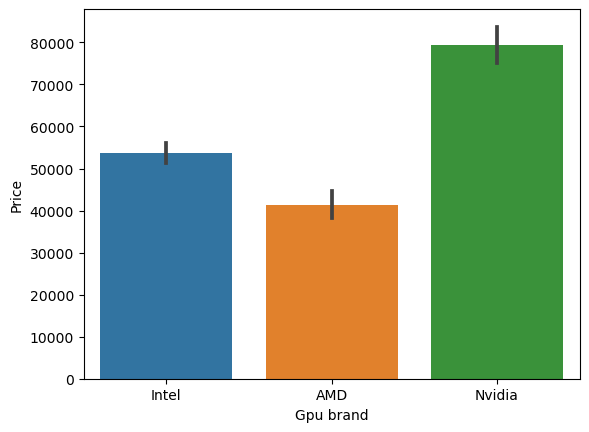

In [93]:
sns.barplot(x=df["Gpu brand"],y=df["Price"])


In [94]:
df.drop(columns=["Gpu"],inplace=True)

C:\Users\sandh\AppData\Local\Temp\ipykernel_22168\1752234203.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["Gpu"],inplace=True)


In [95]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SDD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378,0,1,272.209528,Intel Core i5,0,0,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895,0,0,153.117859,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636,0,0,174.057054,Intel Core i5,0,0,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195,0,1,264.476303,Intel Core i7,0,0,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095,0,1,272.209528,Intel Core i5,0,0,Intel


In [96]:
df["OpSys"].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

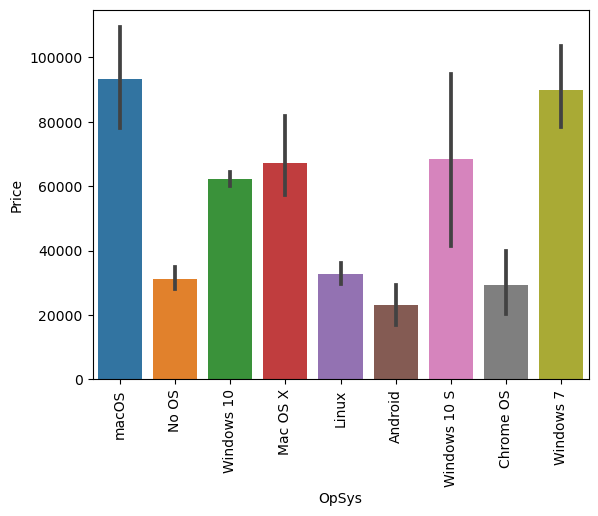

In [97]:
sns.barplot(x=df["OpSys"],y=df["Price"])
plt.xticks(rotation="vertical")
plt.show()

In [98]:
#we will make one function call it  "category",which  categorise the values.. like macos,no os ,and android,windows so on in one columns.
def category_os(inp):
    if inp=="Windows 10" or inp=="Windows 7" or inp=="Windows 10 S":
        return 'Windows'
    elif inp=="mac OS" or inp=="Mac OS X" or inp=="MacOS X":
        return 'Mac'
    else:
        return 'No OS/Linux/Others'

In [99]:
df['os']=df["OpSys"].apply(category_os)


C:\Users\sandh\AppData\Local\Temp\ipykernel_22168\2440313187.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['os']=df["OpSys"].apply(category_os)


In [100]:
df.head(20)

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SDD,Gpu brand,os
0,Apple,Ultrabook,8,macOS,1.37,71378,0,1,272.209528,Intel Core i5,0,0,Intel,No OS/Linux/Others
1,Apple,Ultrabook,8,macOS,1.34,47895,0,0,153.117859,Intel Core i5,0,0,Intel,No OS/Linux/Others
2,HP,Notebook,8,No OS,1.86,30636,0,0,174.057054,Intel Core i5,0,0,Intel,No OS/Linux/Others
3,Apple,Ultrabook,16,macOS,1.83,135195,0,1,264.476303,Intel Core i7,0,0,AMD,No OS/Linux/Others
4,Apple,Ultrabook,8,macOS,1.37,96095,0,1,272.209528,Intel Core i5,0,0,Intel,No OS/Linux/Others
5,Acer,Notebook,4,Windows 10,2.10,21312,0,0,123.834341,AMD Processor,500,0,AMD,Windows
6,Apple,Ultrabook,16,Mac OS X,2.04,114017,0,1,264.476303,Intel Core i7,0,0,Intel,Mac
7,Apple,Ultrabook,8,macOS,1.34,61735,0,0,153.117859,Intel Core i5,0,0,Intel,No OS/Linux/Others
8,Asus,Ultrabook,16,Windows 10,1.30,79653,0,0,193.949289,Intel Core i7,0,0,Nvidia,Windows
9,Acer,Ultrabook,8,Windows 10,1.60,41025,0,1,193.949289,Intel Core i5,0,0,Intel,Windows


In [101]:
df.sample(10)

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SDD,Gpu brand,os
574,Lenovo,Notebook,4,Windows 10,2.05,36496,0,0,174.057054,Intel Core i5,500,0,Intel,Windows
170,Huawei,Ultrabook,8,Windows 10,1.05,71874,0,1,234.977023,Intel Core i5,0,0,Intel,Windows
128,Dell,Notebook,16,Windows 10,2.80,74378,0,0,156.953181,Intel Core i7,2000,0,AMD,Windows
688,HP,Notebook,6,Windows 10,2.65,30316,0,1,156.953181,AMD Processor,2000,0,AMD,Windows
683,HP,Notebook,4,Windows 10,2.50,37242,0,1,156.953181,Intel Core i3,0,0,AMD,Windows
124,Acer,Notebook,4,Windows 10,2.10,24029,0,0,123.834341,AMD Processor,0,0,AMD,Windows
80,Dell,Ultrabook,8,Windows 10,1.88,58403,0,1,174.057054,Intel Core i5,0,0,Intel,Windows
6,Apple,Ultrabook,16,Mac OS X,2.04,114017,0,1,264.476303,Intel Core i7,0,0,Intel,Mac
1083,HP,Ultrabook,16,Windows 10,1.30,109170,0,1,408.314292,Intel Core i7,0,0,Intel,Windows
626,Mediacom,Notebook,2,Windows 10,1.40,12733,0,0,193.949289,Other Intel Processor,0,0,Intel,Windows


In [102]:
df.drop(columns=["OpSys"],inplace=True)

C:\Users\sandh\AppData\Local\Temp\ipykernel_22168\3299756208.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["OpSys"],inplace=True)


In [103]:
df.sample(10)

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SDD,Gpu brand,os
1082,Lenovo,2 in 1 Convertible,4,0.69,34433,1,1,268.840598,Other Intel Processor,0,0,Intel,Windows
896,Dell,Gaming,8,2.62,49497,0,0,174.057054,Intel Core i7,1000,0,Nvidia,No OS/Linux/Others
1164,HP,Notebook,4,2.10,25414,0,0,123.834341,Intel Core i5,500,0,Intel,No OS/Linux/Others
1262,Dell,Notebook,6,2.30,24455,0,0,123.834341,Intel Core i3,1000,0,Intel,Windows
616,Dell,Notebook,4,2.18,30316,0,0,174.057054,Intel Core i5,0,0,AMD,No OS/Linux/Others
8,Asus,Ultrabook,16,1.30,79653,0,0,193.949289,Intel Core i7,0,0,Nvidia,Windows
323,HP,Notebook,8,2.10,48058,0,1,123.834341,Intel Core i7,1000,0,Intel,Windows
37,Dell,Notebook,8,2.80,52161,0,1,156.953181,Intel Core i5,1000,0,AMD,Windows
1126,Lenovo,2 in 1 Convertible,4,0.69,25521,1,1,268.840598,Other Intel Processor,0,0,Intel,Windows
776,Lenovo,Notebook,16,2.50,126273,0,0,348.114108,Intel Core i7,0,0,Nvidia,Windows


<Axes: xlabel='os', ylabel='Price'>

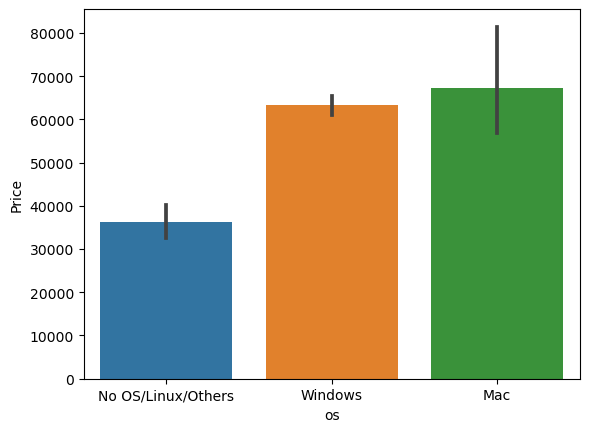

In [104]:
sns.barplot(x=df["os"],y=df["Price"])

C:\Users\sandh\AppData\Local\Temp\ipykernel_22168\1125578356.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

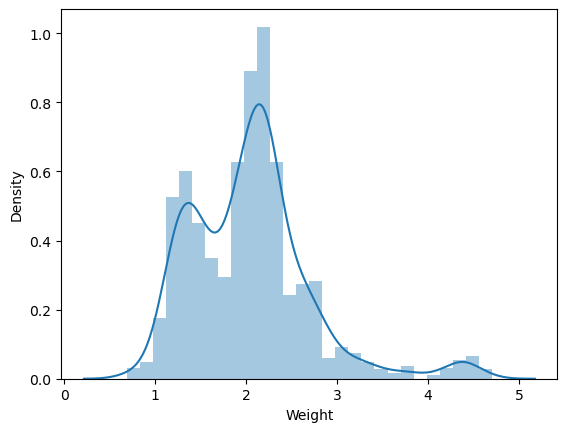

In [105]:
sns.distplot(df['Weight'])

In [106]:
df['Weight'].value_counts()

Weight
2.20    126
2.10     58
2.00     45
2.40     44
2.30     41
       ... 
4.50      1
1.14      1
3.80      1
2.26      1
2.34      1
Name: count, Length: 171, dtype: int64

<Axes: xlabel='Weight', ylabel='Price'>

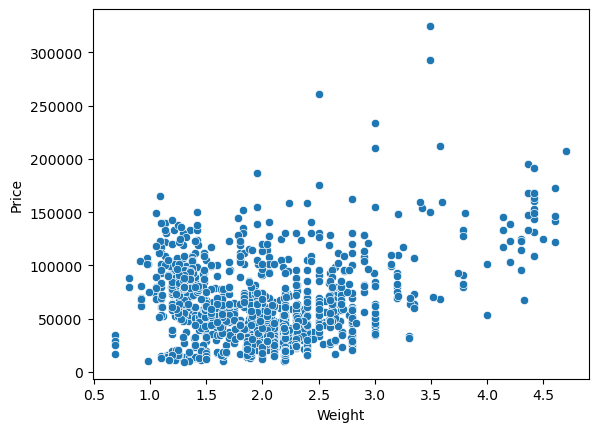

In [107]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

In [108]:
sns.heatmap(df.corr())

ValueError: could not convert string to float: 'Apple'

In [ ]:
df.dtypes

In [ ]:
df["Company"].dtypes

In [109]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SDD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378,0,1,272.209528,Intel Core i5,0,0,Intel,No OS/Linux/Others
1,Apple,Ultrabook,8,1.34,47895,0,0,153.117859,Intel Core i5,0,0,Intel,No OS/Linux/Others
2,HP,Notebook,8,1.86,30636,0,0,174.057054,Intel Core i5,0,0,Intel,No OS/Linux/Others
3,Apple,Ultrabook,16,1.83,135195,0,1,264.476303,Intel Core i7,0,0,AMD,No OS/Linux/Others
4,Apple,Ultrabook,8,1.37,96095,0,1,272.209528,Intel Core i5,0,0,Intel,No OS/Linux/Others


In [110]:
numeric_df = df.select_dtypes(include=['number'])

In [111]:
correlation_matrix = numeric_df.corr()

In [112]:
correlation_matrix

,Ram,Weight,Price,Touchscreen,IPS,ppi,HDD,SDD
Ram,1.000000,0.383362,0.742905,0.118875,0.207949,0.307647,0.095808,NaN
Weight,0.383362,1.000000,0.209867,-0.293004,0.018643,-0.318388,0.514147,NaN
Price,0.742905,0.209867,1.000000,0.192917,0.253319,0.476578,-0.096892,NaN
Touchscreen,0.118875,-0.293004,0.192917,1.000000,0.148026,0.458057,-0.208766,NaN
IPS,0.207949,0.018643,0.253319,0.148026,1.000000,0.297817,-0.093588,NaN
ppi,0.307647,-0.318388,0.476578,0.458057,0.297817,1.000000,-0.293060,NaN
HDD,0.095808,0.514147,-0.096892,-0.208766,-0.093588,-0.293060,1.000000,NaN
SDD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

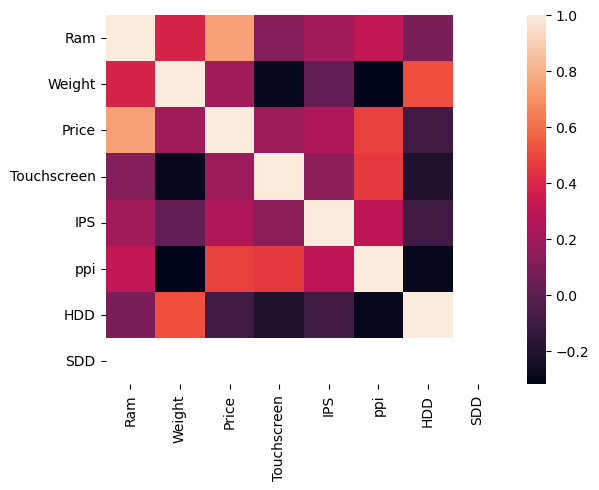

In [113]:
sns.heatmap(numeric_df.corr())

C:\Users\sandh\AppData\Local\Temp\ipykernel_22168\941010651.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Price"])


<Axes: xlabel='Price', ylabel='Density'>

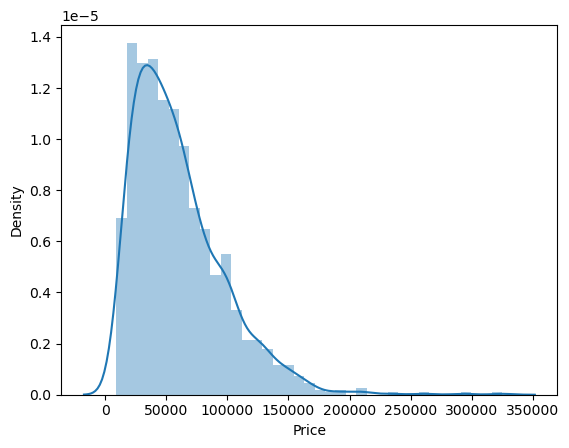

In [114]:
sns.distplot(df["Price"])

C:\Users\sandh\AppData\Local\Temp\ipykernel_22168\2234998481.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))


<Axes: xlabel='Price', ylabel='Density'>

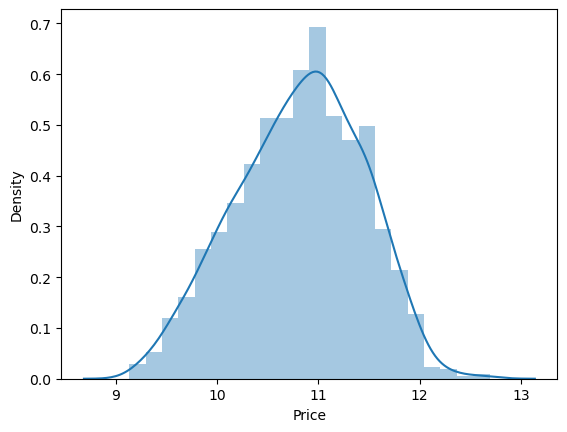

In [115]:
#this price columns are creating skewness in dataset,so we can use np.log function to reduce skewness.
sns.distplot(np.log(df['Price']))

In [116]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])



In [117]:
X 


,Company,TypeName,Ram,Weight,Touchscreen,IPS,ppi,Cpu brand,HDD,SDD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,0,1,272.209528,Intel Core i5,0,0,Intel,No OS/Linux/Others
1,Apple,Ultrabook,8,1.34,0,0,153.117859,Intel Core i5,0,0,Intel,No OS/Linux/Others
2,HP,Notebook,8,1.86,0,0,174.057054,Intel Core i5,0,0,Intel,No OS/Linux/Others
3,Apple,Ultrabook,16,1.83,0,1,264.476303,Intel Core i7,0,0,AMD,No OS/Linux/Others
4,Apple,Ultrabook,8,1.37,0,1,272.209528,Intel Core i5,0,0,Intel,No OS/Linux/Others
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,193.949289,Intel Core i7,0,0,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,340.261910,Intel Core i7,0,0,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,137.986838,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,123.834341,Intel Core i7,1000,0,AMD,Windows


In [118]:
y

0       11.175745
1       10.776766
2       10.329931
3       11.814473
4       11.473093
          ...    
1298    10.433880
1299    11.288106
1300     9.409273
1301    10.614106
1302     9.886341
Name: Price, Length: 1302, dtype: float64

In [170]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)


In [171]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,IPS,ppi,Cpu brand,HDD,SDD,Gpu brand,os
183,Toshiba,Notebook,8,2.00,0,0,123.834341,Intel Core i5,0,0,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,174.057054,Intel Core i7,1000,0,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,166.535838,Other Intel Processor,0,0,Intel,No OS/Linux/Others
1020,Dell,2 in 1 Convertible,4,2.08,1,1,174.057054,Intel Core i3,1000,0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,174.057054,Intel Core i5,1000,0,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,123.834341,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,174.057054,Intel Core i7,0,0,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,123.834341,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,123.834341,Intel Core i3,2000,0,Nvidia,No OS/Linux/Others


In [121]:
#One-hot encoding is a process to convert categorical data into a format that can be provided to machine learning algorithms to 
#do a better job in prediction. 
#It transforms categorical variables into a series of binary columns, each representing one unique value from the original categorical data.

In [188]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [189]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [175]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module='sklearn.preprocessing._encoders')

In [190]:
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])],remainder='passthrough')
step2 = LinearRegression()
pipe = Pipeline([('step1',step1),('step2',step2)])

pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
print('R2 Score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 Score 0.8048421862674917
MAE 0.21558654853639433


# Ridge Regression

In [177]:
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])],remainder='passthrough')
step2 = Ridge(alpha=10)
pipe = Pipeline([('step1',step1),('step2',step2)])

pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
print('R2 Score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 Score 0.8064532300726387
MAE 0.21450263164408764


# LassoRegression

In [178]:
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])],remainder='passthrough')
step2 = Lasso(alpha=0.001)
pipe = Pipeline([('step1',step1),('step2',step2)])

pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
print('R2 Score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 Score 0.8029190212879208
MAE 0.21604300178698235


# KNN

In [179]:
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])],remainder='passthrough')
step2 = KNeighborsRegressor(n_neighbors=3)
pipe = Pipeline([('step1',step1),('step2',step2)])

pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
print('R2 Score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 Score 0.8214439610667235
MAE 0.19590818274562855


# Decision Tree 

In [180]:
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])],remainder='passthrough')
step2 = DecisionTreeRegressor(max_depth=8)
pipe = Pipeline([('step1',step1),('step2',step2)])

pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
print('R2 Score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 Score 0.8268878517308018
MAE 0.18988932993623647


# SVM 

In [181]:
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])],remainder='passthrough')
step2 = SVR(kernel = 'rbf',C=10000,epsilon=0.1)
pipe = Pipeline([('step1',step1),('step2',step2)])

pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
print('R2 Score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 Score 0.8058879743268623
MAE 0.20282121898510536


# Random Forest

In [182]:
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])],remainder='passthrough')
step2 = RandomForestRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
pipe = Pipeline([('step1',step1),('step2',step2)])

pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
print('R2 Score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 Score 0.8766759559096883
MAE 0.16161789774963145


# AdaBoost 

In [183]:
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])],remainder='passthrough')
step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)
pipe = Pipeline([('step1',step1),('step2',step2)])

pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
print('R2 Score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 Score 0.7708678865261194
MAE 0.24472284964927568


# GradientBoost

In [184]:
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])],remainder='passthrough')
step2 = GradientBoostingRegressor(n_estimators=500)
pipe = Pipeline([('step1',step1),('step2',step2)])

pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
print('R2 Score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 Score 0.880619127814277
MAE 0.15854749186861994


# XGBoost

In [200]:
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])],remainder='passthrough')
step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)
pipe = Pipeline([('step1',step1),('step2',step2)])

pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
print('R2 Score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 Score 0.8807806954790051
MAE 0.1572524381231325


## Exporting the model 

In [194]:
import pickle
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [198]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SDD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378,0,1,272.209528,Intel Core i5,0,0,Intel,No OS/Linux/Others
1,Apple,Ultrabook,8,1.34,47895,0,0,153.117859,Intel Core i5,0,0,Intel,No OS/Linux/Others
2,HP,Notebook,8,1.86,30636,0,0,174.057054,Intel Core i5,0,0,Intel,No OS/Linux/Others
3,Apple,Ultrabook,16,1.83,135195,0,1,264.476303,Intel Core i7,0,0,AMD,No OS/Linux/Others
4,Apple,Ultrabook,8,1.37,96095,0,1,272.209528,Intel Core i5,0,0,Intel,No OS/Linux/Others


In [202]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,IPS,ppi,Cpu brand,HDD,SDD,Gpu brand,os
183,Toshiba,Notebook,8,2.00,0,0,123.834341,Intel Core i5,0,0,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,174.057054,Intel Core i7,1000,0,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,166.535838,Other Intel Processor,0,0,Intel,No OS/Linux/Others
1020,Dell,2 in 1 Convertible,4,2.08,1,1,174.057054,Intel Core i3,1000,0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,174.057054,Intel Core i5,1000,0,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,123.834341,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,174.057054,Intel Core i7,0,0,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,123.834341,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,123.834341,Intel Core i3,2000,0,Nvidia,No OS/Linux/Others


In [208]:
df.columns


Index(['Company', 'TypeName', 'Ram', 'Weight', 'Price', 'Touchscreen', 'IPS',
       'ppi', 'Cpu brand', 'HDD', 'SDD', 'Gpu brand', 'os'],
      dtype='object')